PYTHON PROJECT ON GAPMINDER DATASET

Introduction to dataset:.

   Gapminder dataset explains about GDP per capita as a measure of average income per person in a country.The dataset contains information about population,life expectency and gdp percapita from 1952 till 2007 for each county. In this project we are going to use python to address certain questions.
   
Variables used in this dataset are

1: country = Name of the country
2: year = Data collected year
3: population = Population of each country
4: continent = Continent where country is located
5: life_exp = life expectency at birth
6: gdp_cap = GDP per capita

Understanding of dataset
 Before moving to any dataset we must have to understand each variable property. For example in this dataset nearly all columns are self explanatory, but gdp_cap may be confusing in thisproject.We have two different datasets containining information about Gapminder.Both datasets have common keys.
 
  GDP stands for Gross Domestic Product.This measure National income/National output and national expenditure
  
  GDP per capita divides the GDP by the population
  
  Rest of the columns are self explanatory




In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the two Gapminder datasets
Gapminder_dataset1= pd.read_excel("Gapminder_key_1.xlsx")
Gapminder_dataset2 = pd.read_excel("Gapminder_key_2.xlsx")

we have to explore dataset first to find if there are any common keys between them.

In [3]:
#Exploring first five rows of dataset1 using head function
Gapminder_dataset1.head()

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [6]:
#Exploring first five rows of dataset2 using head function
Gapminder_dataset2.head()

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


country and year are common between both datasets as Afghanistan has multiple years, we have to use both columns as keys.

In [7]:
#Merging the two Gapminder datasets into one dataset

Gapminder = Gapminder_dataset1.merge(Gapminder_dataset2, on = ['country','year'] ,how = "outer")
Gapminder


,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


Getting  number of rows and columns in Gapminder Dataset

In [8]:
Gapminder.shape


(1704, 6)

In [13]:
# Checking the datatypes of all variables
Gapminder.dtypes

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

Statistical information/summary of Gapminder Dataset

In [10]:
Gapminder.describe(include='all')

,country,year,population,continent,life_exp,gdp_cap
count,1704,1704.00000,1.704000e+03,1704,1704.000000,1704.000000
unique,142,NaN,NaN,5,NaN,NaN
top,Afghanistan,NaN,NaN,Africa,NaN,NaN
freq,12,NaN,NaN,624,NaN,NaN
mean,NaN,1979.50000,2.960121e+07,NaN,59.474439,7215.327081
std,NaN,17.26533,1.061579e+08,NaN,12.917107,9857.454543
min,NaN,1952.00000,6.001100e+04,NaN,23.599000,241.165876
25%,NaN,1965.75000,2.793664e+06,NaN,48.198000,1202.060309
50%,NaN,1979.50000,7.023596e+06,NaN,60.712500,3531.846988
75%,NaN,1993.25000,1.958522e+07,NaN,70.845500,9325.462346


Q1:Country and continent are string data type,convert them into catergorical data type using programming constructs?

In [14]:
#Gapminder =Gapminder.astype({"country":"category","continent":"category"})

for col in ["country","continent"]:
    Gapminder[col] = Gapminder[col].astype('category')
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


Q2:count of number of countries present in the dataset

In [15]:
Gapminder["country"].nunique

<bound method IndexOpsMixin.nunique of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: category
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']>

There are 142 countries in Gapminder dataset.

Q3:Which country had the lowest life expectancy in 2007?

In [17]:
Gapminder_2007 = Gapminder[Gapminder["year"]==2007]

Gapminder_2007[Gapminder_2007.life_exp == Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


 Swaziland had the lowest life expectancy(39.613) in 2007.

Q4:Which country had the highest GDP per capita in 2007?

In [18]:
Gapminder_2007[Gapminder_2007.gdp_cap == Gapminder_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


Norway had the highest gdp per capita in 2007.

Q5:Which country had the highest GDP  in 2007?

In [23]:
# gdp per capita divides the GDP by the population

Gapminder["gdp"] = Gapminder["gdp_cap"] * Gapminder["population"]
Gapminder_2007 = Gapminder[Gapminder["year"]==2007]
Gapminder_2007[Gapminder_2007.gdp == Gapminder_2007.gdp.max()]

,country,year,population,continent,life_exp,gdp_cap,gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


United States had the highest GDP in 2007

Q6: Graph to show if there is any trend from 1956 to 2007 in life expectancy?

<AxesSubplot:xlabel='year', ylabel='life_exp'>

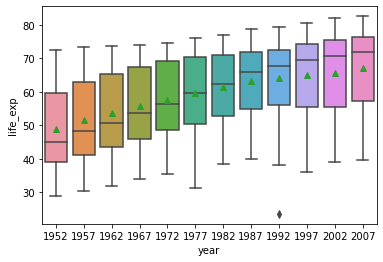

In [32]:
sns.boxplot(x ='year',y ='life_exp',data =Gapminder,showmeans = True)

There is a change in the life expectancy using mean values.

Q7: Which continent has the lowest life expectancy in 2007?

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

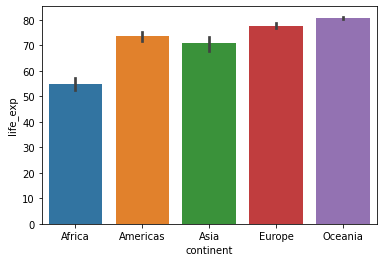

In [33]:
sns.barplot(x ='continent',y ='life_exp',data =Gapminder_2007)

Africa has the lowest life expectancy in 2007

Q8: What was the average(mean) of life expectancy, GDP and gdp per capita in 2007?

In [37]:
 Gapminder_2007.describe()

,year,population,life_exp,gdp_cap,gdp
count,142.0,1.420000e+02,142.000000,142.000000,1.420000e+02
mean,2007.0,4.402122e+07,67.007423,11680.071820,4.092207e+11
std,0.0,1.476214e+08,12.073021,12859.937337,1.311852e+12
min,2007.0,1.995790e+05,39.613000,277.551859,3.190141e+08
25%,2007.0,4.508034e+06,57.160250,1624.842248,1.743849e+10
50%,2007.0,1.051753e+07,71.935500,6124.371108,5.786906e+10
75%,2007.0,3.121004e+07,76.413250,18008.835640,2.759600e+11
max,2007.0,1.318683e+09,82.603000,49357.190170,1.293446e+13


Q9: Is there any relationship between life expectancy and gdp per capita? show each data point by continent.

<AxesSubplot:xlabel='gdp_cap', ylabel='life_exp'>

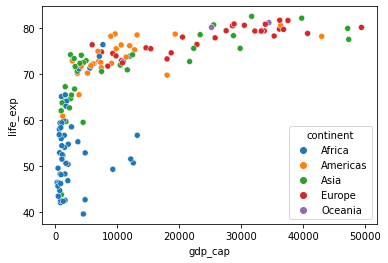

In [38]:
sns.scatterplot(x="gdp_cap",y="life_exp",hue="continent",data=Gapminder_2007)

From plot it seems that countries having higher life expectency also has higher GDP per captia however there is no trend or relationship.

Q10:What can be done to see the relationship better between life expectancy and gdp percapita?
 

Text(0, 0.5, 'life expectancy in years')

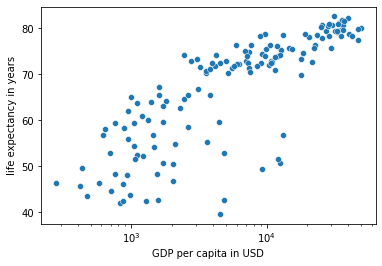

In [42]:
sns.scatterplot(x="gdp_cap",y="life_exp",data=Gapminder_2007)
# converting gdp_cap column into log scale
plt.xscale('log')
plt.xlabel('GDP per capita in USD')
plt.ylabel("life expectancy in years")

From the current scatter plot we can clearly say that there is a correlation between GDP per capita and life expectency .As one goes up another also goes up.
Adding more information make plot more meaningful.

Q11: What is the trend of life expectency in india from 1952-2007?

<AxesSubplot:xlabel='year', ylabel='life_exp'>

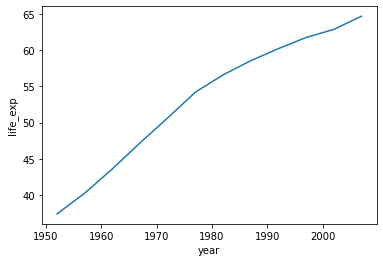

In [47]:
Gapminder_India = Gapminder[Gapminder["country"] == "India"]
Gapminder_India.head()
sns.lineplot(x ='year',y='life_exp',data =Gapminder_India)

In the above chart we can see trend of life expectency is incresing between 1952 to 2007.

Q12: What is the trend in GDP in india from 1952-2007?

<AxesSubplot:xlabel='year', ylabel='gdp'>

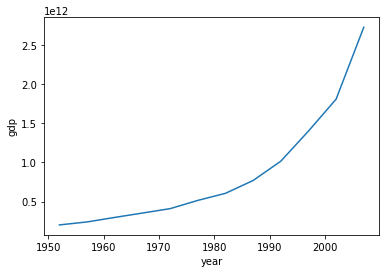

In [46]:
Gapminder_India = Gapminder[Gapminder["country"] == "India"]

sns.lineplot(data = Gapminder_India,x="year",y="gdp")

In the above chart we can see trend of gdp is decresing between 1952 to 1990 and incresing between 1992 to 2007.

Q13:What is the median age of each continent by year?

In [48]:
#grouping the year and continent and finding the median of life expectency
Gapminder_medianage = Gapminder.groupby(["year","continent"])["life_exp"].median()
Gapminder_medianage

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ